In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import numpy as np

In [3]:
train_data_dir = "C:\\Users\\kulka\\Downloads\\DL\\DL\\minist-jpg\\train"
test_data_dir = "C:\\Users\\kulka\\Downloads\\DL\\DL\\minist-jpg\\test"

train_datagen = ImageDataGenerator(
rescale = 1.0/255
)

test_datagen = ImageDataGenerator(
rescale = 1.0/255
)

train_batch_size = 10000
train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(28,28),
    batch_size = train_batch_size,
    class_mode = 'categorical',
    color_mode = 'grayscale',
    shuffle = True
)

test_batch_size = 2000
test_generator = test_datagen.flow_from_directory(
    test_data_dir,
    target_size=(28,28),
    batch_size = test_batch_size,
    class_mode = 'categorical',
    color_mode = 'grayscale',
    shuffle = True
)

Found 60000 images belonging to 10 classes.
Found 10000 images belonging to 10 classes.


In [4]:
xtrain,ytrain = train_generator[0]
xtest,ytest = test_generator[0]

In [5]:
model = keras.Sequential([keras.layers.Flatten(input_shape=(28,28,1)),
                         keras.layers.Dense(128,activation="relu"),
                         keras.layers.Dense(10,activation="softmax")])

In [8]:
model.compile(optimizer="sgd",loss="categorical_crossentropy",metrics=['accuracy'])
history = model.fit(xtrain,ytrain,validation_data=(xtest,ytest),epochs=10)

Epoch 1/10
313/313 [==============================] - 1s 2ms/step - loss: 0.3421 - accuracy: 0.9045 - val_loss: 0.3293 - val_accuracy: 0.9065
Epoch 2/10
313/313 [==============================] - 0s 1ms/step - loss: 0.3306 - accuracy: 0.9082 - val_loss: 0.3229 - val_accuracy: 0.9070
Epoch 3/10
313/313 [==============================] - 0s 1ms/step - loss: 0.3198 - accuracy: 0.9101 - val_loss: 0.3160 - val_accuracy: 0.9095
Epoch 4/10
313/313 [==============================] - 0s 1ms/step - loss: 0.3106 - accuracy: 0.9117 - val_loss: 0.3080 - val_accuracy: 0.9130
Epoch 5/10
313/313 [==============================] - 0s 1ms/step - loss: 0.3014 - accuracy: 0.9165 - val_loss: 0.3049 - val_accuracy: 0.9125
Epoch 6/10
313/313 [==============================] - 1s 2ms/step - loss: 0.2935 - accuracy: 0.9168 - val_loss: 0.3000 - val_accuracy: 0.9145
Epoch 7/10
313/313 [==============================] - 1s 2ms/step - loss: 0.2863 - accuracy: 0.9200 - val_loss: 0.2949 - val_accuracy: 0.9165
Epoch 

In [9]:
test_loss, test_acc = model.evaluate(xtest,ytest)
print(f"Loss: {test_loss * 100:.1f}%")
print(f"Accuracy: {test_acc * 100:.1f}%")

63/63 [==============================] - 0s 1ms/step - loss: 0.2828 - accuracy: 0.9190
Loss: 28.3%
Accuracy: 91.9%


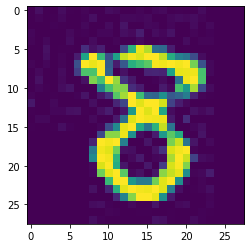

63/63 [==============================] - 0s 868us/step
Actual number: 8
Predicted number: 8


In [15]:
import random
n = random.randint(0,999)
plt.imshow(xtest[n])
plt.show()
predicted_value = model.predict(xtest)
print("Actual number:",np.argmax(ytest[n]))
print("Predicted number:", np.argmax(predicted_value[n]))

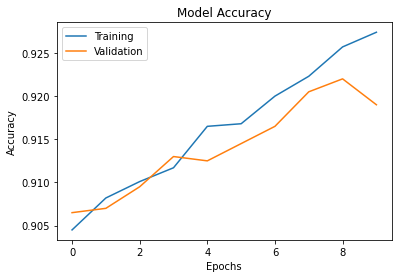

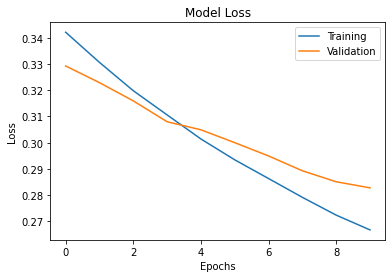

In [16]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("Model Accuracy")
plt.legend(['Training','Validation'])
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Model Loss")
plt.legend(['Training','Validation'])
plt.show()